## Problema Ejemplo de Sistema Paralelo Equilibrado

<i>Version simplificada con coeficiente de fricción único</i>

Dos depósitos abiertos están conectados por un sistema de dos tuberías en paralelo. El caudal total de intercambio no tiene que superar los 0.15 $m^3/s$ y por el ramal 1 se desea un caudal de 0.1 $m^3/s$. En la primera rama se consideran despreciables los elementos de pérdidas secundarias, tiene una longitud de 600 m y un diámetro interior de 250 mm. La segunda rama  tiene una longitud de 100 m y un diámetro de 150 mm. Usar una válvula de control para conseguir el equilibrio entre caudales. Para simplificar el problema , usar un coeficiente de fricción f = 0.02. Finalmente, verificar las diferencias entre los f reales y el adoptado.

In [1]:
from math import pi
from math import *
from scipy.constants import g
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Definición de funciones de trabajo

In [1]:
def area(d):
    return pi * 0.25 * d**2

def _req(d,l,f=0.02):
    return 8*f*l/(pi**2 * g * d**5)

def nRe(q,d,nu=1e-6):
    return 4*q/(pi * nu * d)

def _leq(k,d,f=0.02):
    return k*d / f

def Q_from_H(H,rh):
    return sqrt(H / rh)

def Leq_from_req(rh,d,f = 0.02):
    return (rh * pi**2 * g * D**5)/(8. * f)

### Datos del problema

In [2]:
D1 = 0.25 # m
D2 = 0.15 # m
L1 = 600 # m
L2 = 100 # m
f = 0.02 
Q = 0.15 # m^3/s
Q1 = 0.1 # m^3/s
Q2dis = Q - Q1

Calculamos las resistencias hidráulicas con las longitudes totales, reales más equivalentes.

In [3]:
req1 = _req(D1,L1);req1
print('req1 = {:.2f} s^2/m^5'.format(req1))

req1 = 1015.67 s^2/m^5


Se necesita un desnivel entre depósitos

In [4]:
H1 = req1 * Q1**2
print('H1 = %.2f m' % H1)

H1 = 10.16 m


In [5]:
req2 = _req(D2,L2);
print('req2 = {:.2f} s^2/m^5'.format(req2))

req2 = 2176.92 s^2/m^5


Esta resitencia hidráulica permite un caudal de

In [6]:
Q2 = Q_from_H(H1,req2)
print('Q2 = %.3f m^3/s' % Q2)

Q2 = 0.068 m^3/s


Que es mayor al deseado de 0.05 m3/s

In [7]:
Q2,Q2dis

(0.068305197459637, 0.04999999999999999)

La resistencia hidráulica necesaria para conseguir el caudal de diseño

In [8]:
req2dis = H1 / Q2dis**2
print('req2 = %.1f s^2/m^5' % req2dis)

req2 = 4062.7 s^2/m^5


La longitud total de diseño se obtiene de la solución de la ecuación de la resistencia hidráulica

In [9]:
func = lambda x : req2dis - _req(D2,x)
x_initial_guess = 150
ltot = fsolve(func,x_initial_guess)
print('L tot = %.1f m' % ltot[0])

L tot = 186.6 m


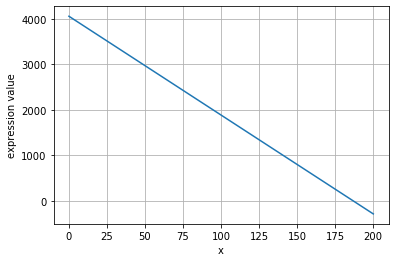

In [10]:
# Plot it

x = np.linspace(0., 200, 201)

plt.plot(x, func(x))
plt.xlabel("x")
plt.ylabel("expression value")
plt.grid()
plt.show()

La longitud extra necesaria es

In [11]:
leqV = ltot[0] - L2
print('L tot = %.1f m' %leqV )

L tot = 86.6 m


Esto implica una válvula ocn un ajuste como el siguiente

In [12]:
Kv = f*leqV/D2
print('Kv = %.1f' % Kv)

Kv = 11.5
